<a href="https://colab.research.google.com/github/Muskan2401/Image_Differences_CV/blob/main/Img_Diff_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Comparison using CV**

**Goal**->To develop a model or use traditional computer vision techniques to detect the difference between two images and draw bounding boxes around the detected differences.

**Objective:**

*   To use any suitable computer vision technique to identify the difference between two images.
*   The model should take two input images, identify areas with difference, and draw a bounding box around each area where it detects a difference.

*  To calculate and print a similarity score to evaluate your model.


**Importing Libraries and reading images**

In [88]:
#importing libraries
from skimage.metrics import structural_similarity
import imutils
import cv2
from google.colab.patches import cv2_imshow

# Load the first and second images
img1=cv2.imread('input1.png')
img2=cv2.imread('input2.png')

**Preprocessing**

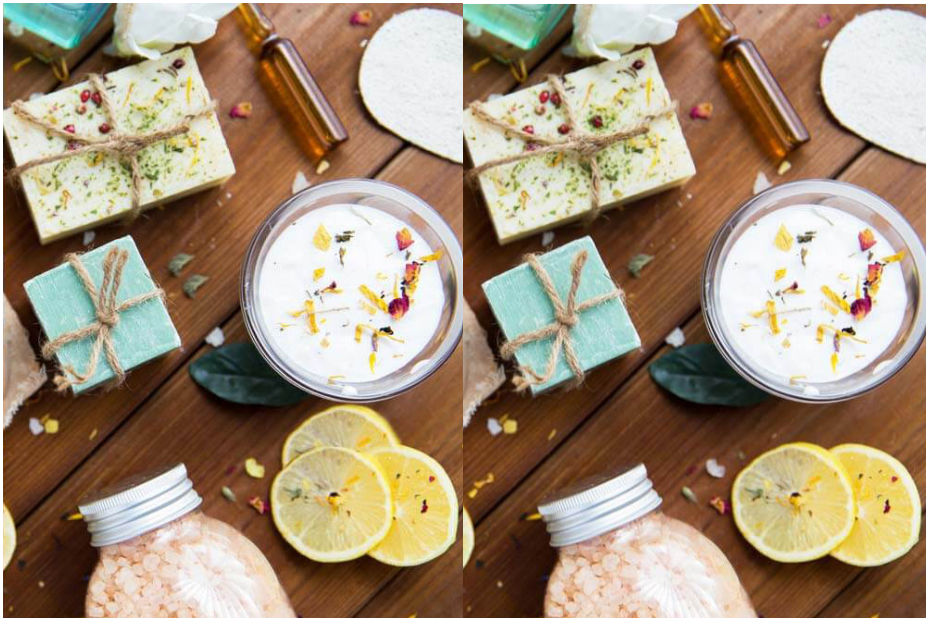

In [86]:
# Convert images to grayscale
gray_img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray_img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Resize images to a common size
common_size = (min(gray_img1.shape[1], gray_img2.shape[1]), min(gray_img1.shape[0], gray_img2.shape[0]))

gray_img1 = cv2.resize(gray_img1, common_size)
gray_img2 = cv2.resize(gray_img2, common_size)

img1 = cv2.resize(img1, common_size)
img2 = cv2.resize(img2, common_size)

final_frame = cv2.hconcat((img1, img2))
cv2_imshow(final_frame)


**Differences and Evaluation**

Structural Similarity Index: 0.6380487401379207


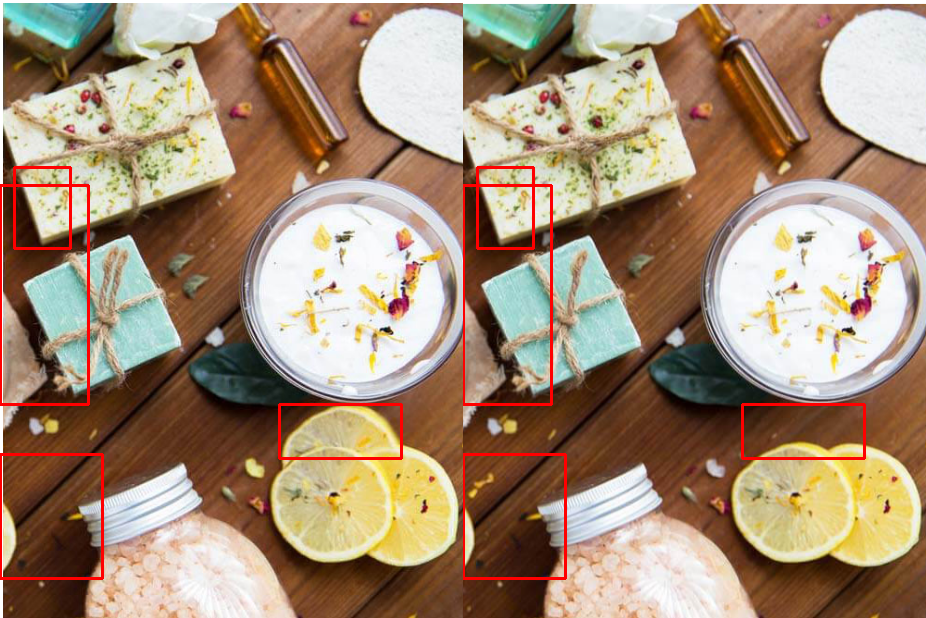

In [87]:
# Compute structural similarity
(score, diff) = structural_similarity(gray_img1, gray_img2, full=True)
diff = (diff * 255).astype("uint8")
print("Structural Similarity Index: {}".format(score))

# Apply thresholding
thresh = cv2.threshold(diff, 60, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Set a minimum contour area to filter out small differences
min_contour_area = 500

# Draw bounding boxes on first and second images, filtering small contours
for c in cnts:
    contour_area = cv2.contourArea(c)
    if contour_area > min_contour_area:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Save images and show the final frame
if score < 1:
    cv2.imwrite('Comparison1.png', img1)
    cv2.imwrite('Comparison2.png', img2)
    cv2.imwrite('diff.png', diff)

final_frame = cv2.hconcat((img1, img2))
cv2_imshow(final_frame)
